
Simple linear regression




 Initilization
 

In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import math

df = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [15]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


Correlation Analysis

In [2]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


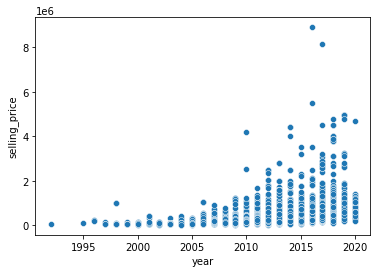

In [6]:
X = df["year"]
y = df["selling_price"]

sns.scatterplot(X ,y)

Pre-Processing

In [7]:
endog = df['selling_price']
exog = sm.add_constant(df[['selling_price']])
print(exog)

      const  selling_price
0       1.0          60000
1       1.0         135000
2       1.0         600000
3       1.0         250000
4       1.0         450000
...     ...            ...
4335    1.0         409999
4336    1.0         409999
4337    1.0         110000
4338    1.0         865000
4339    1.0         225000

[4340 rows x 2 columns]


Model building:


In [8]:
mod = sm.OLS(endog, exog)
results = mod.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.381e+34
Date:                Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:02:13   Log-Likelihood:                 88670.
No. Observations:                4340   AIC:                        -1.773e+05
Df Residuals:                    4338   BIC:                        -1.773e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.274e-11   6.53e-12     -5.015

In [10]:
def RSE(y_true, y_predicted):
   
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = math.sqrt(RSS / (len(y_true) - 2))
    return rse


In [13]:
rse= RSE(df['year'],results.predict())
print(rse)

766177.9875270971


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


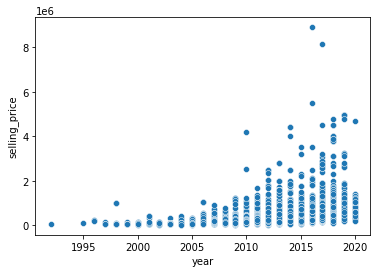

In [16]:
X1 = df["year"]
y1 = df["selling_price"]

sns.scatterplot(X1 ,y1)

In [19]:
endog1 = df['selling_price']
exog1 = sm.add_constant(df[['km_driven']])
print(exog)

      const  selling_price
0       1.0          60000
1       1.0         135000
2       1.0         600000
3       1.0         250000
4       1.0         450000
...     ...            ...
4335    1.0         409999
4336    1.0         409999
4337    1.0         110000
4338    1.0         865000
4339    1.0         225000

[4340 rows x 2 columns]


In [20]:
mod1 = sm.OLS(endog1, exog1)
results1 = mod1.fit()
print (results1.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     166.6
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           2.03e-37
Time:                        17:21:23   Log-Likelihood:                -63660.
No. Observations:                4340   AIC:                         1.273e+05
Df Residuals:                    4338   BIC:                         1.273e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.621e+05    1.5e+04     44.232      0.0